In [1]:
%matplotlib inline
import numpy as np
import skyrandoms 
import matplotlib.pyplot as plt
from skyrandoms import SkyRandoms
import pandas as pd

In [2]:
db = skyrandoms.SkyRandomsDatabase('../local_data/skyrandoms.db')

In [23]:
#%%time
#db.add_random_batch(npoints=10000000, max_chunk_size=1000000)

CPU times: user 4min 6s, sys: 1min 21s, total: 5min 28s
Wall time: 47min 55s


In [3]:
df = db.query_region([330, 331], [8, 10])

In [4]:
df.describe()

,id,ra,dec,detected
count,5.310000e+02,531.000000,531.000000,531.0
mean,5.486098e+06,330.503356,8.997347,0.0
std,3.196000e+06,0.296582,0.572481,0.0
min,2.660000e+02,330.000157,8.004569,0.0
25%,2.845854e+06,330.241268,8.501082,0.0
50%,5.288804e+06,330.505355,8.961244,0.0
75%,8.399408e+06,330.746581,9.499735,0.0
max,1.098673e+07,330.998555,9.998193,0.0


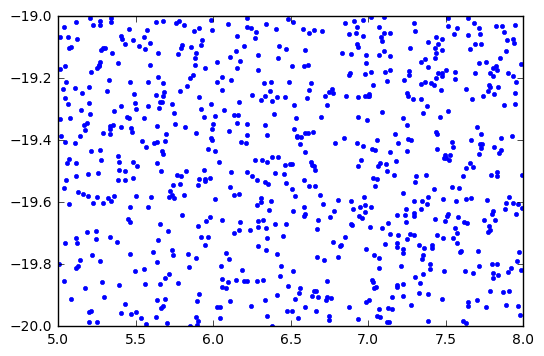

In [13]:
plt.plot(df['ra'], df['dec'], '.')

In [26]:
def _get_chunks(chunk_size, total_size):
    remainder = int(total_size % chunk_size)
    num_chunks = int(total_size // chunk_size)
    return num_chunks, remainder

In [34]:
newdb = skyrandoms.SkyRandomsDatabase('../local_data/newskyrandoms.db', 
                                      ra_lim=hsc_fps['r6'].ra_lim, dec_lim=hsc_fps['r6'].dec_lim,
                                      overwrite=True)
newdb.area*10/(1/60.**2), _get_chunks(1e6, newdb.area*10/(1/60.**2))

(3885631.8240195392, (3, 885631))